<a href="https://www.aus.edu/"><img src="https://i.imgur.com/pdZvnSD.png" width=200> </a>

<h1 align=center><font size = 5>Logistic Regression</font>
<h1 align=center><font size = 5>Prepared by Alex Aklson, Ph.D.</font>
<h1 align=center><font size = 5>October 03, 2024</font>

#### Import Libraries

As always, let's start by importing the libaries and packages that we will be using.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

#### Read in Datasets

Read in the training and test datasets.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/MLR503/training_data.csv')
test_df = pd.read_csv('/content/drive/MyDrive/MLR503/test_data.csv')

Check out the training dataset by displaying the first five datapoints.

In [5]:
train_df.head()

,feature_1,feature_2,target
0,1.288951,-0.524080,1
1,-0.905316,0.155444,0
2,0.882096,0.920059,0
3,1.980711,0.348378,1
4,0.542652,0.550213,0


And check out the dimension of the training dataset.

In [6]:
train_df.shape

(350, 3)

Do the same for the test set.

In [7]:
test_df.head()

,feature_1,feature_2,target
0,0.380177,0.142964,1
1,0.193159,0.398784,1
2,0.216360,0.300315,1
3,1.135471,-0.555398,1
4,0.441942,-0.375001,1


In [8]:
test_df.shape

(150, 3)

#### Prepare Data for Modelling

Separate features and target into different variables.

In [9]:
X_train = train_df[["feature_1", "feature_2"]]
y_train = train_df["target"]

In [10]:
X_test = test_df[["feature_1", "feature_2"]]
y_test = test_df["target"]

#### Visualize the Data

Let's plot a scatter plot of the training dataset.

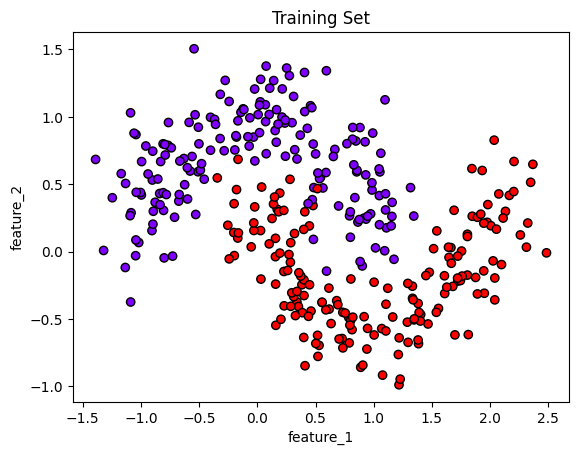

In [11]:
plt.scatter(X_train["feature_1"], X_train["feature_2"], c=y_train, cmap='rainbow', edgecolor='k')
plt.title("Training Set")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()

#### Plot a scatter plot of the test set.

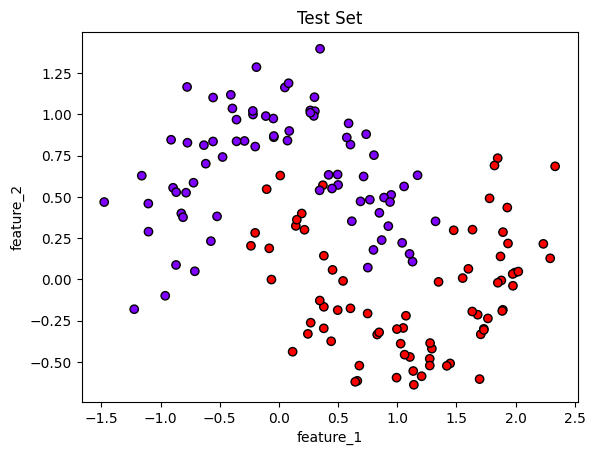

In [12]:
### Add your code here


plt.scatter(X_test["feature_1"], X_test["feature_2"], c=y_test, cmap='rainbow', edgecolor='k')
plt.title("Test Set")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()


#### Modelling

We start by instantiating a LogisticRegression object with penalty=None.

In [13]:
model = LogisticRegression(penalty=None, max_iter=10000)

Then we fit the model on the training data.

In [14]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, penalty=None)

Gradient Descent was used to find the weight parameters that define our logistic regression hypothesis. Remember that our hypothesis is given by:

$$
\displaystyle h_w(x) = \frac{1}{1 + e^{-(w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n)}}
$$

In this case, we only have two features, so our hypothesis is:

$$
\displaystyle h_w(x) = \frac{1}{1 + e^{-(w_0 + w_1x_1 + w_2x_2)}}
$$

Let's get the estimated weights.

In [15]:
model.coef_

array([[ 1.23635096, -4.88283383]])

$w_1$ = 1.236 and $w_2$ = -4.883.

In [16]:
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]

In [17]:
print(w_1, w_2)

1.2363509641804675 -4.882833829838997


In [18]:
model.intercept_

array([0.58520034])

$w_0$ = 0.585.

In [20]:
w_0 = model.intercept_[0]

In [21]:
print(w_0)

0.5852003434164758


#### Question: What is the label of point (0.5, -0.5) using the estimated parameters?

In [22]:
### Use this cell to answer the question

prob = 1 / (1 + np.exp(-(w_0 + w_1 * 0.5 + w_2 * (-0.5))))
label = 1 if prob >= 0.5 else 0
print(f"Probability: {prob}, Label: {label}")


Probability: 0.9745384062594783, Label: 1


Now, let's apply our model to the test set. Remember that the hypothesis outputs the probability that each datapoint's label is $y = 1$.

In [23]:
test_set_probabilities = model.predict_proba(X_test)

Let's take a look at the first probabilities.

In [24]:
test_set_probabilities[:5, :]

array([[0.41164606, 0.58835394],
       [0.75457893, 0.24542107],
       [0.64878242, 0.35121758],
       [0.00900474, 0.99099526],
       [0.04914143, 0.95085857]])

In [25]:
test_df['hypothesis_probability'] = test_set_probabilities[:, 1]

In [26]:
test_df.head()

,feature_1,feature_2,target,hypothesis_probability
0,0.380177,0.142964,1,0.588354
1,0.193159,0.398784,1,0.245421
2,0.216360,0.300315,1,0.351218
3,1.135471,-0.555398,1,0.990995
4,0.441942,-0.375001,1,0.950859


Let's define a function to plot the decision boundary

In [27]:
def plot_decision_boundary(model, X, y, resolution=500):
    x_min, x_max = X["feature_1"].min() - 0.1, X["feature_1"].max() + 0.1
    y_min, y_max = X["feature_2"].min() - 0.1, X["feature_2"].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_df = pd.DataFrame(grid_points, columns=["feature_1", "feature_2"])

    Z = model.predict(grid_df)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap='rainbow')
    plt.contour(xx, yy, Z, colors='k', linewidths=2)
    plt.scatter(X["feature_1"], X["feature_2"], c=y, s=20, edgecolor='k', cmap='rainbow')
    plt.title("Decision Boundary")
    plt.show()

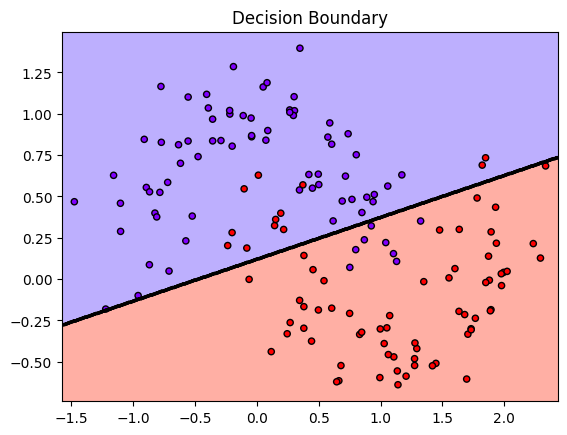

In [28]:
plot_decision_boundary(model, X_test, y_test)

Let's get the class labels.

In [29]:
test_labels = model.predict(X_test)

Let's add them to the test data.

In [30]:
test_df['predicted_labels'] = test_labels

In [31]:
test_df.head()

,feature_1,feature_2,target,hypothesis_probability,predicted_labels
0,0.380177,0.142964,1,0.588354,1
1,0.193159,0.398784,1,0.245421,0
2,0.216360,0.300315,1,0.351218,0
3,1.135471,-0.555398,1,0.990995,1
4,0.441942,-0.375001,1,0.950859,1


Let's calculate the test cost, which is defined as:

$$
\displaystyle J(w) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_w(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_w(x^{(i)})) \right]
$$

In [32]:
test_loss = log_loss(y_test, model.predict_proba(X_test))

In [33]:
print(test_loss)

0.278030489631667


#### Question: Can you calculate the training cost?

In [34]:
### Add your answer here

train_loss = log_loss(y_train, model.predict_proba(X_train))
print(train_loss)



0.2807140596961386


#### Print the training cost and compare it to the test cost. Which one is lower?

In [35]:
### Add your answer here

print(f"Training Cost: {train_loss}, Test Cost: {test_loss}")




Training Cost: 0.2807140596961386, Test Cost: 0.278030489631667


#### Engineer More Features

In [36]:
degree = 1

Instantiate a polynomial feature generator instance.

In [37]:
features_generator = PolynomialFeatures(degree, include_bias=False)

Generate Additional Features for the Defined Degree.

In [38]:
X_poly_train = features_generator.fit_transform(X_train)
X_poly_test = features_generator.transform(X_test)

Get the names of the generated features and view the resulting data as a pandas dataframe.

In [39]:
column_names = features_generator.get_feature_names_out(input_features=X_train.columns)
polynomial_features_df = pd.DataFrame(X_poly_train, columns=column_names)

In [40]:
polynomial_features_df.head()

,feature_1,feature_2
0,1.288951,-0.524080
1,-0.905316,0.155444
2,0.882096,0.920059
3,1.980711,0.348378
4,0.542652,0.550213


#### For the new datasets, can you build a logistic regression model and calculate the training and the test costs?

(Use the following cells to do that)

In [41]:
### Instantiate a Logistic Regression Instance

model_poly = LogisticRegression(penalty=None, max_iter=10000)


In [42]:
### Fit it on the new training data

model_poly.fit(X_poly_train, y_train)


LogisticRegression(max_iter=10000, penalty=None)

In [43]:
### Calculate the training and test costs, print them, and compare them. Any noticable difference compared to the previous costs?

train_loss_poly = log_loss(y_train, model_poly.predict_proba(X_poly_train))
test_loss_poly = log_loss(y_test, model_poly.predict_proba(X_poly_test))



Let's update our function to plot the decision boundary to include additional polynomial features.

In [44]:
def plot_decision_boundary_polynomial(model, X, y, features_generator, resolution=500):
    x_min, x_max = X["feature_1"].min() - 0.1, X["feature_1"].max() + 0.1
    y_min, y_max = X["feature_2"].min() - 0.1, X["feature_2"].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_df = pd.DataFrame(grid_points, columns=["feature_1", "feature_2"])

    grid_poly = features_generator.transform(grid_df)

    Z = model.predict(grid_poly)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap='rainbow')
    plt.contour(xx, yy, Z, colors='k', linewidths=2)
    plt.scatter(X["feature_1"], X["feature_2"], c=y, s=20, edgecolor='k', cmap='rainbow')
    plt.title("Decision Boundary with Polynomial Features")
    plt.show()

Now, let's plot the new decision boundary.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


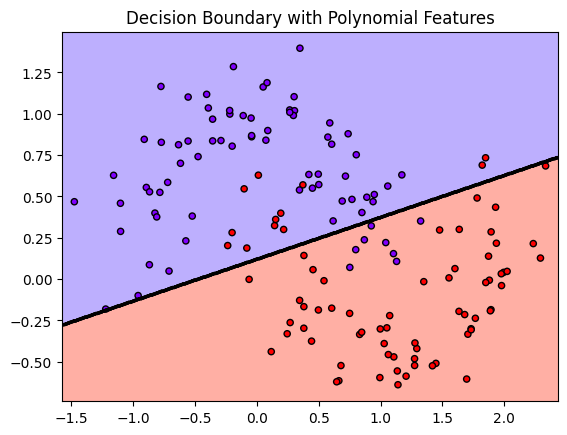

In [45]:
plot_decision_boundary_polynomial(model, X_test, y_test, features_generator)

#### Repeat the process for Degrees 2, 3, 5, and 7.

##### Start with Degree 2.

In [ ]:
### Repeat for Degrees 3, 5, and 7.


In [46]:
degrees = [2, 3, 5, 7]

for degree in degrees:

    features_generator = PolynomialFeatures(degree, include_bias=False)

    X_poly_train = features_generator.fit_transform(X_train)
    X_poly_test = features_generator.transform(X_test)

    model_poly = LogisticRegression(penalty=None, max_iter=10000)

    model_poly.fit(X_poly_train, y_train)

    train_loss_poly = log_loss(y_train, model_poly.predict_proba(X_poly_train))
    test_loss_poly = log_loss(y_test, model_poly.predict_proba(X_poly_test))

    print(f"Degree {degree} - Training Cost: {train_loss_poly}, Test Cost: {test_loss_poly}")
    print("-" * 50)

Degree 2 - Training Cost: 0.2803330205865444, Test Cost: 0.2774789552860147
--------------------------------------------------
Degree 3 - Training Cost: 0.031340211023224894, Test Cost: 0.0460320287279212
--------------------------------------------------
Degree 5 - Training Cost: 0.02445702563262271, Test Cost: 0.07988127701257386
--------------------------------------------------
Degree 7 - Training Cost: 0.024938282246025765, Test Cost: 0.19063478011017926
--------------------------------------------------


In [47]:
def fit_and_plot_polynomial_logistic(X_train, X_test, y_train, y_test, degree):

    # generate polynomial features
    features_generator = PolynomialFeatures(degree)
    X_poly_train = features_generator.fit_transform(X_train)
    X_poly_test = features_generator.transform(X_test)

    # fit a logistic regression model
    model = LogisticRegression(penalty=None, max_iter=10000)
    model.fit(X_poly_train, y_train)

    # plot the decision boundary for training and test data
    plot_decision_boundary_polynomial(model, X_train, y_train, features_generator)
    plot_decision_boundary_polynomial(model, X_test, y_test, features_generator)

    # calculate training and test cost
    train_loss = log_loss(y_train, model.predict_proba(X_poly_train))
    test_loss = log_loss(y_test, model.predict_proba(X_poly_test))

    return train_loss, test_loss

Loop through polynomial degrees and evaluate performance.

Fitting polynomial degree 2


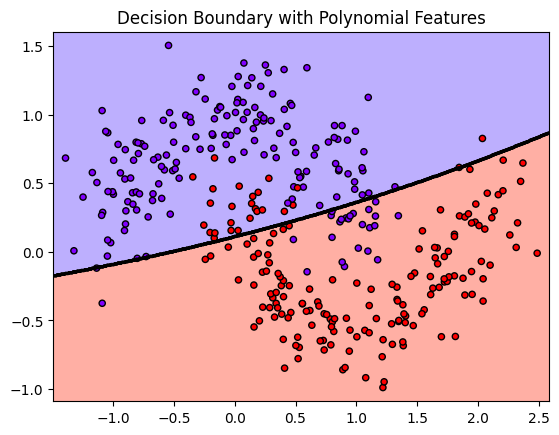

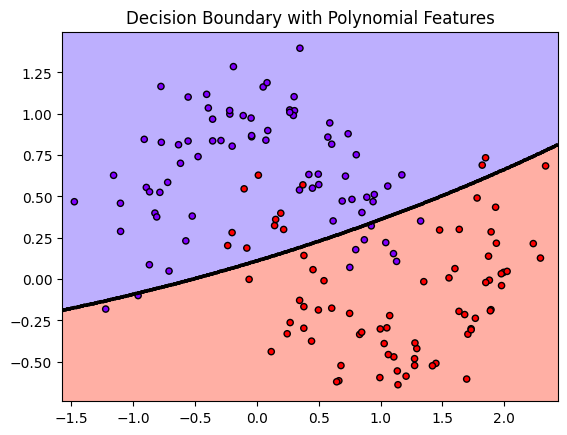

Fitting polynomial degree 3


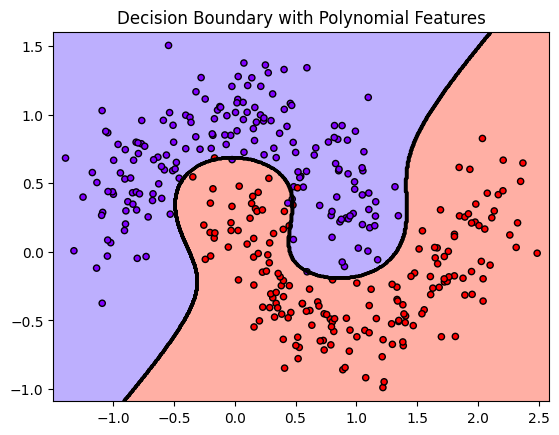

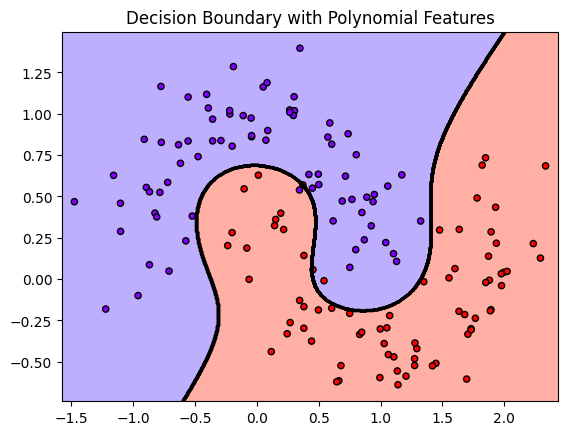

Fitting polynomial degree 5


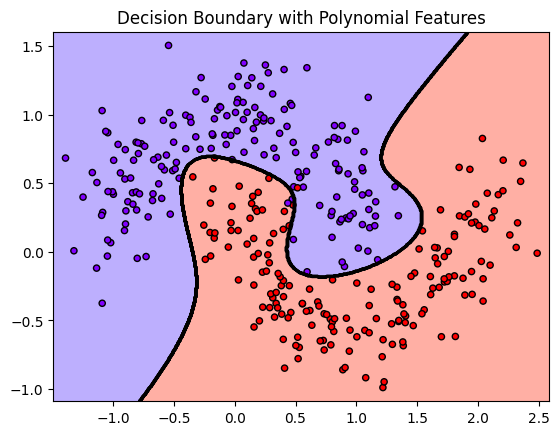

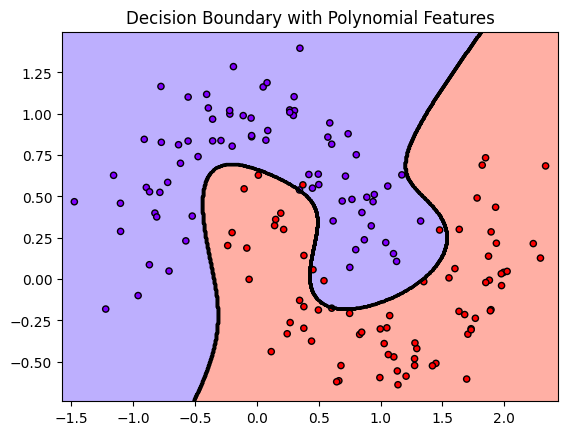

Fitting polynomial degree 7


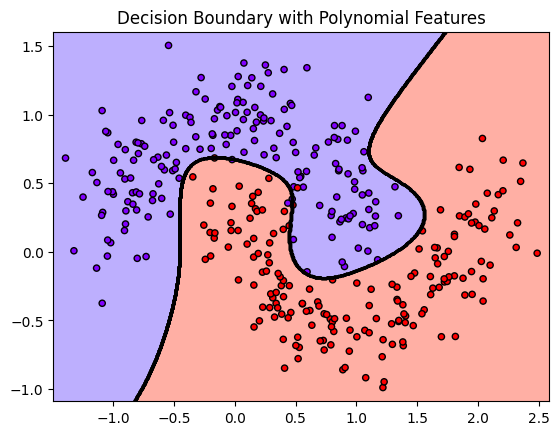

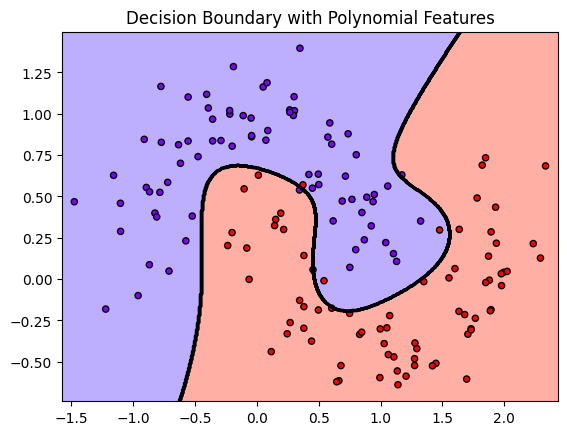

In [50]:
degrees = [2, 3, 5, 7]
train_losses = []
test_losses = []

for degree in degrees:
    print("Fitting polynomial degree {}".format(degree))
    train_loss, test_loss = fit_and_plot_polynomial_logistic(X_train, X_test, y_train, y_test, degree)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

Plot training and test loss as a function of polynomial degree.

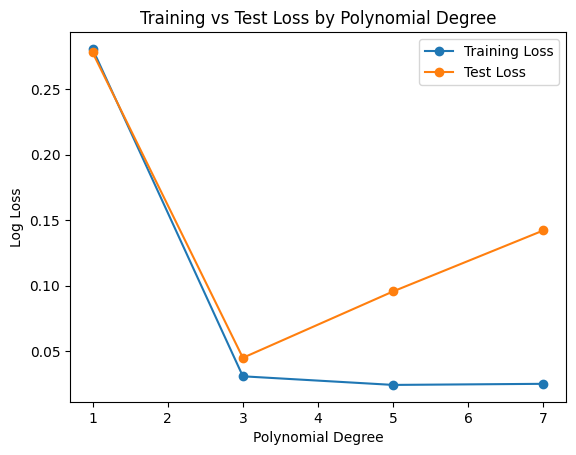

In [49]:
plt.plot(degrees, train_losses, label="Training Loss", marker='o')
plt.plot(degrees, test_losses, label="Test Loss", marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("Log Loss")
plt.title("Training vs Test Loss by Polynomial Degree")
plt.legend()
plt.show()

In [51]:
print(train_losses)
print(test_losses)

[0.2803331723851441, 0.030912309074985607, 0.024336204354154668, 0.025176796032674004]
[0.27747184034303934, 0.04502798043957592, 0.0957085957667808, 0.14224370999055608]
